In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

In [3]:
# import csv file
df = pd.read_csv('Azad Mart.csv', encoding= 'unicode_escape')

In [9]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode
0,4918,CA-2019-160304,2019-01-01,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.94,1,28.2668,0,Online
1,4919,CA-2019-160304,2019-01-02,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.94,3,38.2668,0,Online
2,4920,CA-2019-160304,2019-01-02,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,East,TEC-PH-10000455,Technology,Phones,GE 30522EE2,231.98,2,67.2742,0,Cards
3,3074,CA-2019-125206,2019-01-03,2019-01-05,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,...,West,OFF-ST-10003692,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.46,2,28.6150,0,Online
4,8604,US-2019-116365,2019-01-03,2019-01-08,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,Central,TEC-AC-10002217,Technology,Accessories,ImationÂ Clip USBÂ flash driveÂ - 8 GB,30.08,2,-5.2640,0,Online


In [10]:
#row,column count of data
df.shape

(5901, 21)

In [11]:
#column names of table
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Profit', 'Returns', 'Payment Mode'],
      dtype='object')

In [241]:
#check data type of columns/attributes
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Profit           float64
Returns            int64
Payment Mode      object
dtype: object

In [242]:
#Lets check if there are any missing values in the data
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Profit           0
Returns          0
Payment Mode     0
dtype: int64

There are no missing values. Hence we can go exploratory analysis part directly.

In [13]:
df.describe()

,Row ID,Sales,Quantity,Profit,Returns
count,5901.000000,5901.000000,5901.000000,5901.000000,5901.000000
mean,5022.422471,265.345589,3.781901,29.700408,0.048636
std,2877.977184,474.260645,2.212917,259.589138,0.215124
min,1.000000,0.836000,1.000000,-6599.978000,0.000000
25%,2486.000000,71.976000,2.000000,1.795500,0.000000
50%,5091.000000,128.648000,3.000000,8.502500,0.000000
75%,7456.000000,265.170000,5.000000,28.615000,0.000000
max,9994.000000,9099.930000,14.000000,8399.976000,1.000000


# Exploratory Data Analysis

#

We can analyse the data further in 3 different ways

1. PRODUCT LEVEL ANALYSIS
2. CUSTOMER LEVEL ANALYSIS
3. ORDER LEVEL ANALYSIS 

Lets look at the product categories available to shop for customers

In [243]:
df['Category'].unique()

array(['Furniture', 'Technology', 'Office Supplies'], dtype=object)

In [244]:
#number of products in each category
df['Category'].value_counts()

Category
Office Supplies    3569
Furniture          1249
Technology         1083
Name: count, dtype: int64

In [245]:
#number of Sub-categories products are divided.
df['Sub-Category'].nunique()

17

In [246]:
#number of products in each sub-category
df['Sub-Category'].value_counts()

Sub-Category
Binders        915
Paper          825
Furnishings    573
Phones         519
Storage        498
Art            465
Accessories    461
Chairs         355
Appliances     279
Labels         211
Tables         190
Envelopes      133
Bookcases      131
Fasteners      124
Supplies       119
Machines        65
Copiers         38
Name: count, dtype: int64

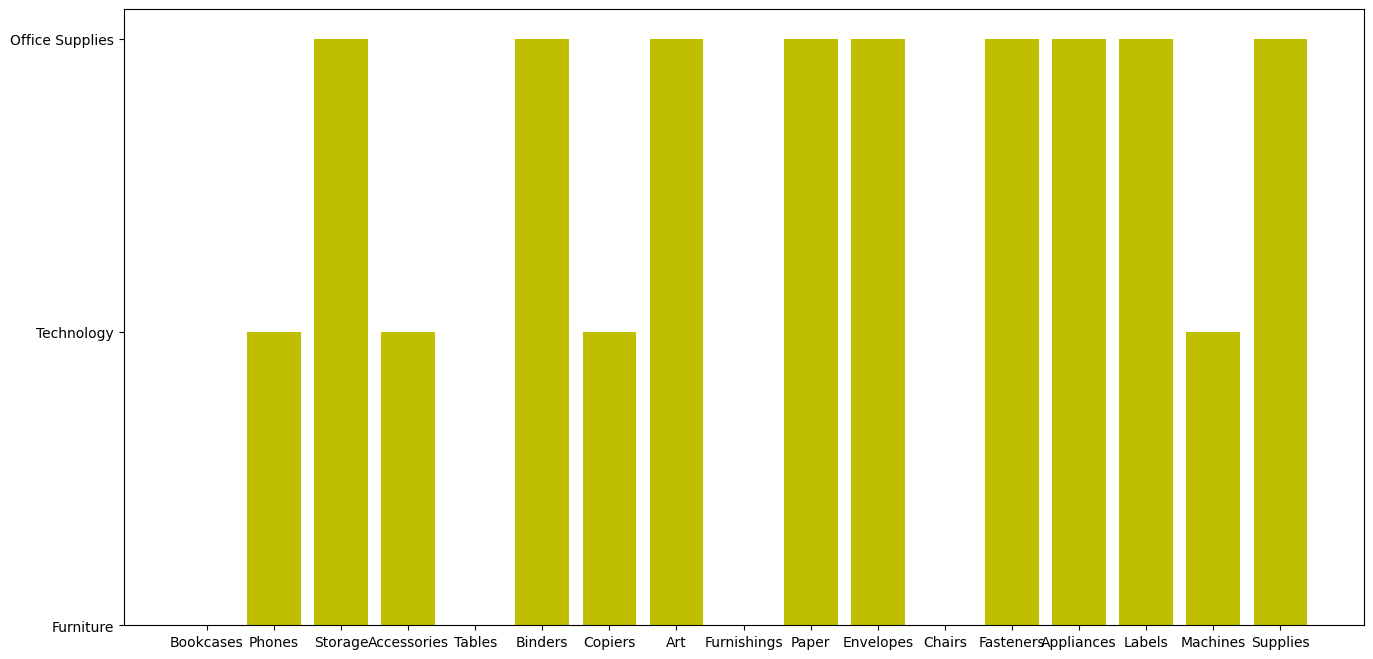

In [247]:
#Lets see how sub-categories are distributed wrt to category
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category',data=df,color='y')
plt.show()

From this graph, one can easily makeout which Category & Sub-Category to choose when they are looking to purchase a product

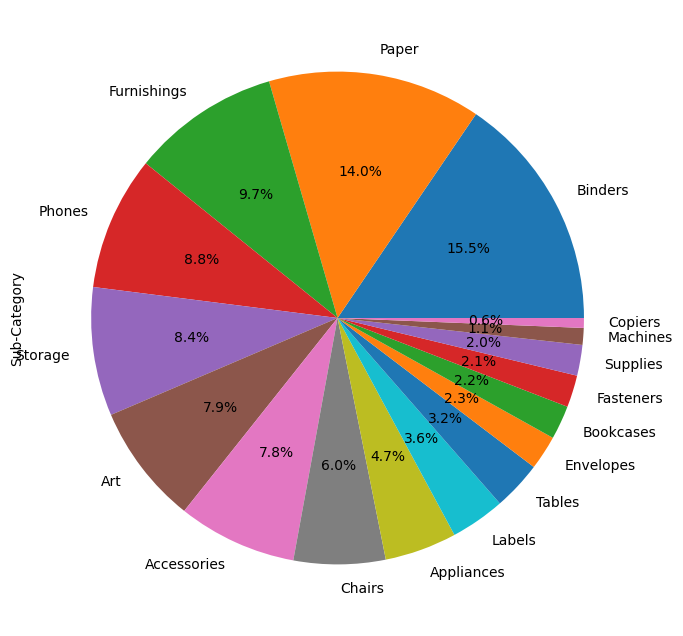

In [17]:
plt.figure(figsize=(10,8))
df['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.ylabel('Sub-Category')
plt.show()

The store has wide variety of Office Supplies especially in Binders and Paper department.

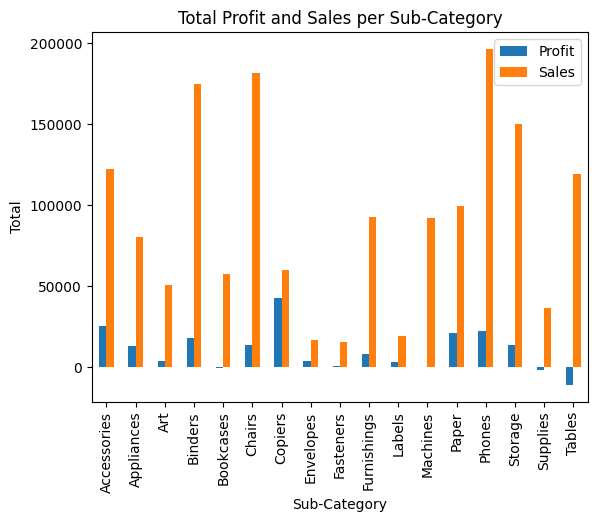

In [18]:
# Group by 'Sub-Category' and aggregate 'Profit' and 'Sales' using 'sum'
grouped_df = df.groupby('Sub-Category')[['Profit', 'Sales']].agg('sum')

# Plot the bar chart
grouped_df.plot(kind='bar')
plt.title('Total Profit and Sales per Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total')
plt.show()

Highest profit is earned in Copiers while Selling price for Chairs and Phones is extremely high compared to other products.

Another interesting fact- people dont prefer to buy Tables and Bookcases from Superstore. Hence these departments are in loss.

In [250]:
#number of products available in store
df['Product Name'].nunique()

1742

In [251]:
df['Product Name'].value_counts()

Product Name
Easy-staple paper                               27
Staples                                         24
Staple envelope                                 22
Staples in misc. colors                         13
Chromcraft Round Conference Tables              12
                                                ..
Sony 8GB Class 10 Micro SDHC R40 Memory Card     1
Letter Slitter                                   1
Avery 479                                        1
OIC Thumb-Tacks                                  1
Acco Glide Clips                                 1
Name: count, Length: 1742, dtype: int64

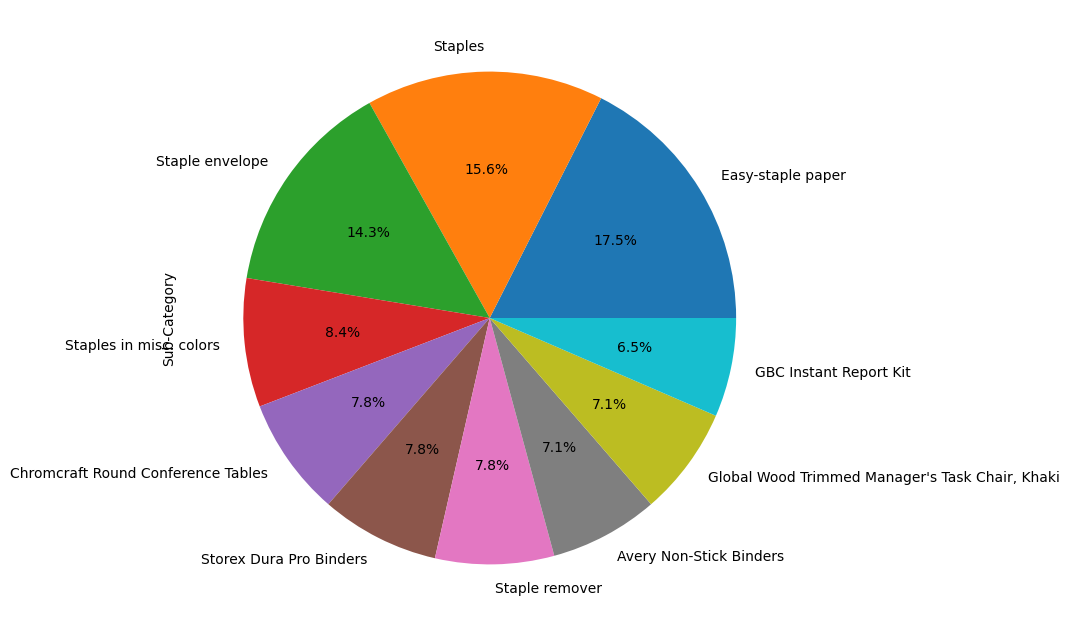

In [20]:
#Distribution of Top 10 Products
plt.figure(figsize=(10,8))
df['Product Name'].value_counts().head(10).plot.pie(autopct="%1.1f%%")
plt.ylabel('Sub-Category')
plt.show()

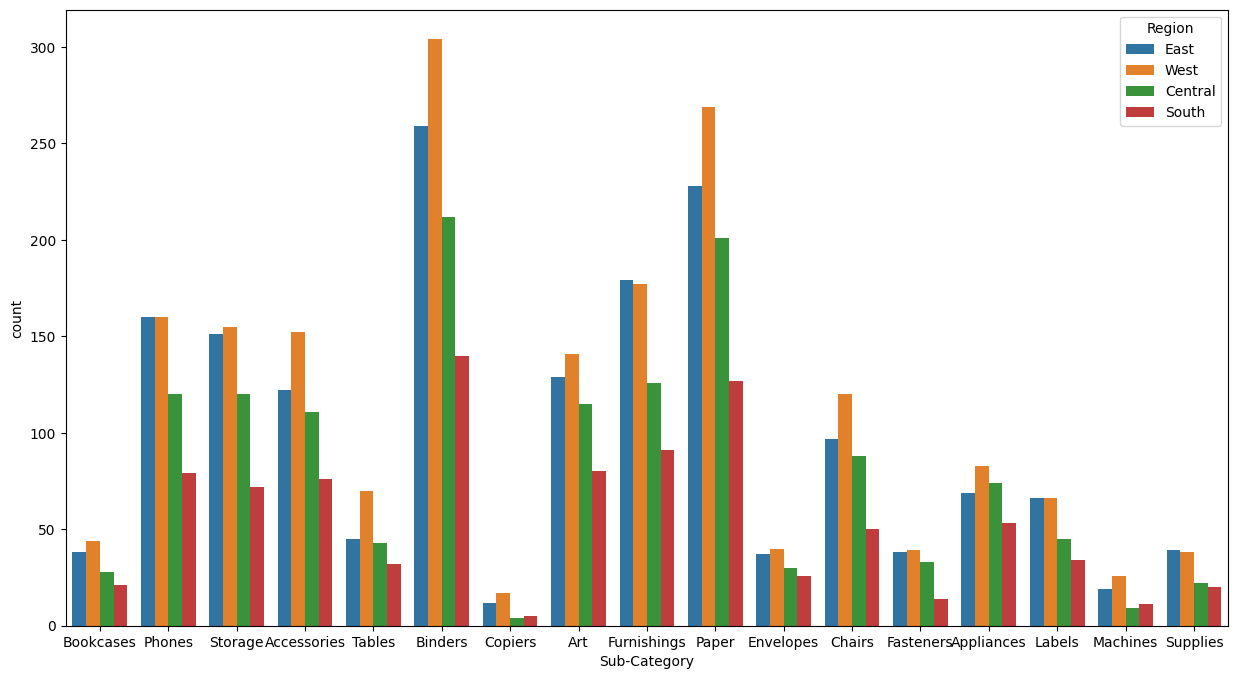

In [21]:
#Count of Sub-Category region wise
plt.figure(figsize=(15,8))
sns.countplot(x="Sub-Category", hue="Region", data=df)
plt.show()

People residing in Western part of US tend to order more from superstore.

To understand the data better. Lets create some new columns like Cost,Profit%

In [23]:
df['Cost']=df['Sales']-df['Profit']
df['Cost'].head()

0     45.6732
1    135.6732
2    164.7058
3     85.8450
4     35.3440
Name: Cost, dtype: float64

In [24]:
df['Profit %']=(df['Profit']/df['Cost'])*100

In [25]:
# Profit Percentage of the first 5 product names
df.iloc[[0, 1, 2, 3, 4], [15, -1]]

,Product Name,Profit %
0,"Bush Westfield Collection Bookcases, Medium Ch...",61.889248
1,"Bush Westfield Collection Bookcases, Medium Ch...",28.205128
2,GE 30522EE2,40.845070
3,Recycled Steel Personal File for Hanging File ...,33.333333
4,ImationÂ Clip USBÂ flash driveÂ - 8 GB,-14.893617


In [26]:
#Products with high Profit Percentage 
df.sort_values(['Profit %','Product Name'],ascending=False).groupby('Profit %').head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode,Cost,Profit %
5486,9728,CA-2020-167395,2020-12-02,2020-12-04,First Class,KM-16720,Kunst Miller,Consumer,United States,Lowell,...,Technology,Phones,GE 30524EE4,289.950,5,284.1855,1,Cards,5.7645,4929.924538
5415,2661,CA-2020-123372,2020-11-28,2020-12-02,Standard Class,DG-13300,Deirdre Greer,Corporate,United States,New York City,...,Technology,Phones,Google Nexus 5,524.890,11,494.9725,0,Cards,29.9175,1654.458093
5236,4191,CA-2020-166709,2020-11-17,2020-11-22,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,...,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,5517.970,3,5039.9856,0,COD,477.9844,1054.424705
5109,8595,CA-2020-159667,2020-11-09,2020-11-13,Standard Class,PM-19135,Peter McVee,Home Office,United States,Jacksonville,...,Technology,Phones,Motorola L703CM,36.168,4,31.1980,0,Online,4.9700,627.726358
5867,271,CA-2020-163979,2020-12-28,2021-01-02,Second Class,KH-16690,Kristen Hastings,Corporate,United States,San Francisco,...,Office Supplies,Storage,Adjustable Depth Letter/Legal Cart,244.840,4,210.4936,0,COD,34.3464,612.854913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5826,4620,CA-2020-145219,2020-12-24,2020-12-25,First Class,RM-19675,Robert Marley,Home Office,United States,Los Angeles,...,Technology,Copiers,Hewlett Packard LaserJet 3310 Copier,536.952,6,1007.9832,0,Cards,-471.0312,-213.994997
4895,2624,CA-2020-127180,2020-10-22,2020-10-24,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,...,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,2212.968,4,3919.9888,0,COD,-1707.0208,-229.639194
2447,9040,CA-2019-117121,2019-12-17,2019-12-21,Standard Class,AB-10105,Adrian Barton,Consumer,United States,Detroit,...,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,2892.740,13,4946.3700,0,Online,-2053.6300,-240.859843
5488,5531,CA-2020-160885,2020-12-02,2020-12-06,Standard Class,JK-16090,Juliana Krohn,Consumer,United States,Omaha,...,Technology,Phones,ClearOne CHATAttach 160 -Â speaker phone,521.960,4,743.9880,0,Cards,-222.0280,-335.087466


Retailers selling Phone,Binders,Papers have got 100% Profit in their Business.

#### LETS LOOK AT THE DATA WRT TO CUSTOMER LEVEL

In [258]:
df['Customer ID'].nunique()

773

In [259]:
#Top 10 customers who order frequently
df_top10=df['Customer Name'].value_counts().head(10)
df_top10

Customer Name
Emily Phan        27
Seth Vernon       25
Paul Prost        25
Edward Hooks      25
Pete Kriz         24
Sally Hughsby     23
William Brown     23
Lena Cacioppo     23
Mick Hernandez    22
Dean percer       22
Name: count, dtype: int64

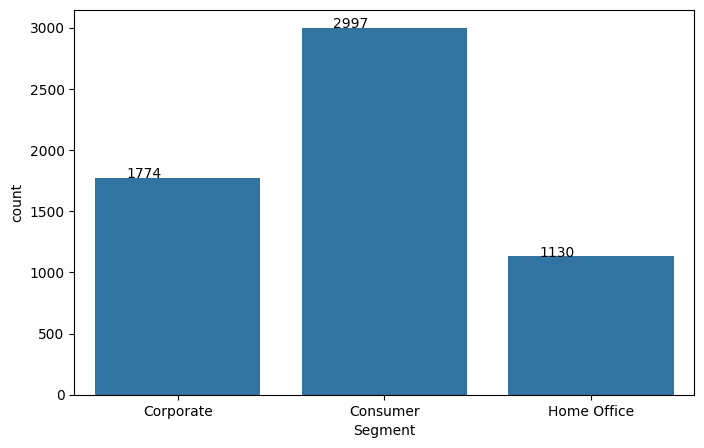

In [260]:
# Create the figure and axis
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)

# Create the countplot without explicitly passing data
s = sns.countplot(x='Segment', data=df)

# Annotate each bar with its count
for p in s.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.15, p.get_height() + 1))

# Show the plot
plt.show()


The distribution is highest in Consumer Segment.

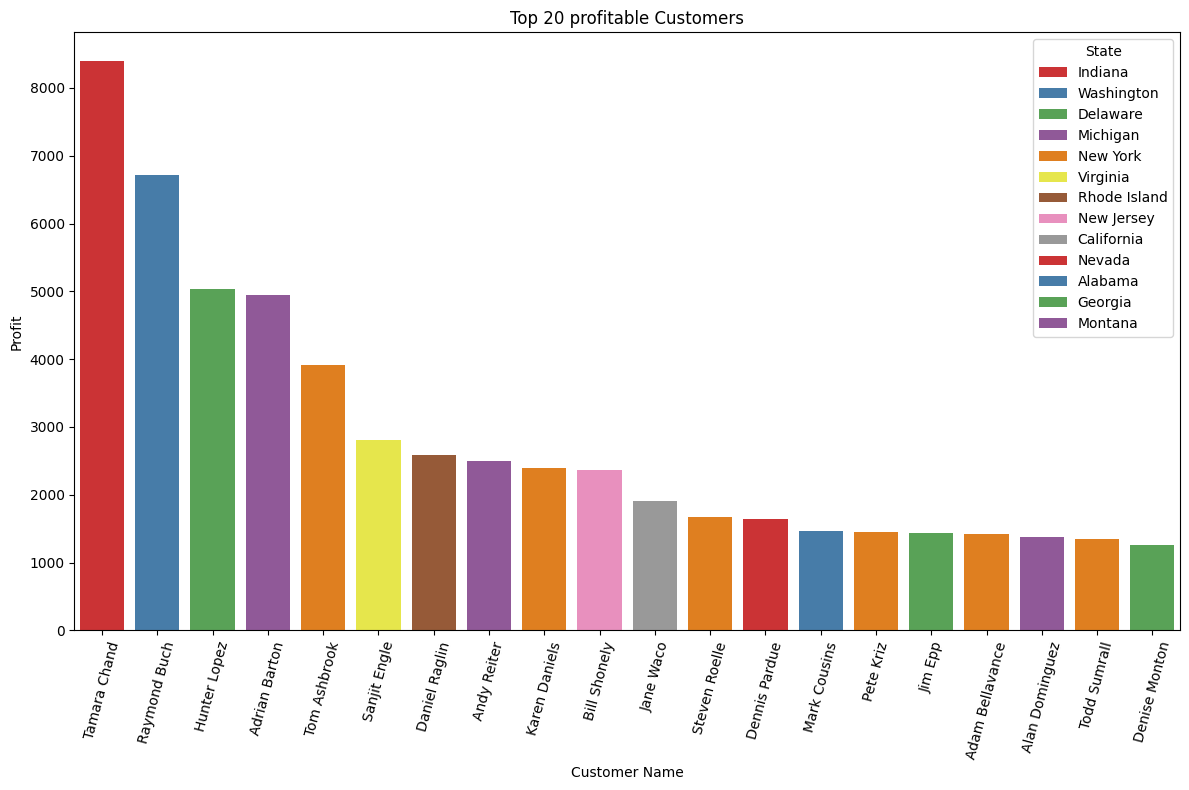

In [37]:
sortedTop20 = df.sort_values(['Profit'], ascending=False).head(20)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
p = sns.barplot(x='Customer Name', y='Profit',hue='State',palette='Set1', data=sortedTop20, ax=ax)
ax.set_title("Top 20 profitable Customers")
ax.set_xticklabels(p.get_xticklabels(), rotation=75)
plt.tight_layout()
plt.show()

We see that majority of the Profitable Customers are from New York and Michigan State.

Lets do some do some Analysis with Order details of the data

In [39]:
#number of unique orders
df['Order ID'].nunique()

3003

In [40]:
#Calculating the time taken for an order to ship and converting the no. of days in int format
df['Shipment Duration']=(pd.to_datetime(df['Ship Date'])-pd.to_datetime(df['Order Date'])).dt.days
df['Shipment Duration']

0       6
1       5
2       5
3       2
4       5
       ..
5896    4
5897    4
5898    4
5899    4
5900    4
Name: Shipment Duration, Length: 5901, dtype: int64

In [41]:
df.iloc[:,[1,4,23]]

,Order ID,Ship Mode,Shipment Duration
0,CA-2019-160304,Standard Class,6
1,CA-2019-160304,Standard Class,5
2,CA-2019-160304,Standard Class,5
3,CA-2019-125206,First Class,2
4,US-2019-116365,Standard Class,5
...,...,...,...
5896,CA-2020-143259,Standard Class,4
5897,CA-2020-115427,Standard Class,4
5898,CA-2020-156720,Standard Class,4
5899,CA-2020-143259,Standard Class,4


Lets find out some more details about each Customer like total products purchased,Products they purchase,First Purchase Date,Last Purchase Date,Location from where the Customer placed an order.

In [42]:
#creating function and appending customer and order info to it.
def agg_customer(x):
    d = []
    d.append(x['Order ID'].count())
    d.append(x['Sales'].sum())
    d.append(x['Profit %'].mean())
    d.append(pd.to_datetime(x['Order Date']).min())
    d.append(pd.to_datetime(x['Order Date']).max())
    d.append(x['Product Name'].unique())
    d.append(x['City'].unique())
    return pd.Series(d, index=['#Purchases','Total_Sales','Average Profit % gained','First_Purchase_Date','Latest_Purchase_Date','Products Purchased','Location_Count'])

In [43]:
#grouping based on Customer ID and applying the function we created above
df_agg = df.groupby('Customer ID').apply(agg_customer)
df_agg

,#Purchases,Total_Sales,Average Profit % gained,First_Purchase_Date,Latest_Purchase_Date,Products Purchased,Location_Count
Customer ID,,,,,,,
AA-10315,6,4919.552,15.489687,2019-03-03,2020-06-29,"[High Speed Automatic Electric Letter Opener, ...","[Round Rock, Minneapolis]"
AA-10375,9,2015.020,27.156215,2019-07-10,2020-12-11,"[Sterilite Officeware Hinged File Box, Logitec...","[Mesa, Atlanta, Providence, New York City]"
AA-10480,11,1862.052,51.077776,2019-07-17,2020-04-15,"[Strathmore Photo Frame Cards, Carina 42""Hx23 ...","[Springfield, Detroit, Concord]"
AA-10645,9,1757.145,47.099870,2019-07-04,2020-11-05,"[Master Caster Door Stop, Brown, Inter-Office ...","[San Francisco, Georgetown, San Diego]"
AB-10015,2,563.940,28.968254,2019-11-10,2019-11-10,"[Samsung Convoy 3, Sauder Facets Collection Li...",[Oklahoma City]
...,...,...,...,...,...,...,...
XP-21865,15,1797.694,42.165746,2019-08-26,2020-11-17,"[Deflect-o Glass Clear Studded Chair Mats, Max...","[Athens, Chicago, Los Angeles, Belleville, Pas..."
YC-21895,4,2635.160,29.662778,2019-04-07,2020-12-26,[Hewlett Packard 610 Color Digital Copier / Pr...,"[San Francisco, Dallas, Fremont]"
YS-21880,7,5956.264,21.652043,2020-04-13,2020-12-21,"[Global Wood Trimmed Manager's Task Chair, Kha...","[Hesperia, Columbus, Burlington, Seattle, Oakl..."


In [44]:

# Convert 'Order Date' column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract the year from the 'Order Date' column
df['Order Year'] = df['Order Date'].dt.year

# Display the 'Order Year' column
print(df['Order Year'])


0       2019
1       2019
2       2019
3       2019
4       2019
        ... 
5896    2020
5897    2020
5898    2020
5899    2020
5900    2020
Name: Order Year, Length: 5901, dtype: int32


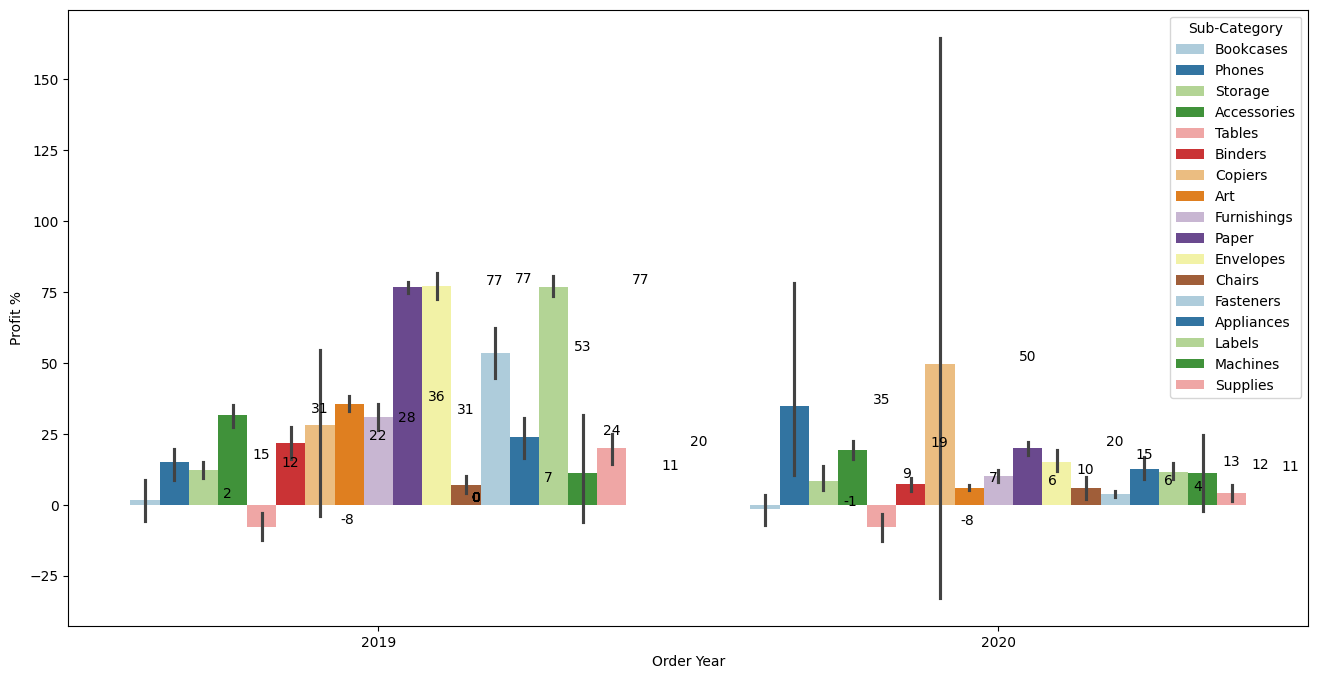

In [46]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111)
sns.barplot(x='Order Year', y='Profit %', hue='Sub-Category', palette='Paired', data=df)

for o in ax.patches:
    ax.annotate('{:.0f}'.format(o.get_height()), (o.get_x() + 0.15, o.get_height() + 1))

plt.show()

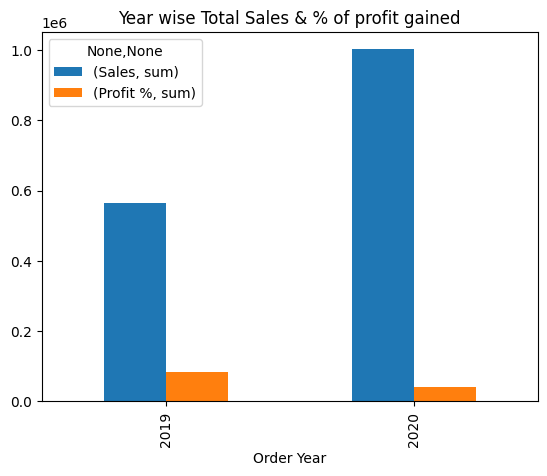

In [290]:
df.groupby('Order Year')[['Sales', 'Profit %']].agg(['sum']).plot.bar()
plt.title('Year wise Total Sales & % of profit gained')
plt.show()

Sales of the store has increased every year resulting in high profit margin by the end of 2020.